# <h1 align="center"> K-Means Cluster

In [1]:
import numpy as np
import pandas as pd
import sklearn

**Loading data from csv file to the data frame**

In [2]:
columns = ['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response']
data = pd.read_csv('rawdataset.csv', sep=',', names=columns)
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09/09/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08/05/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06/06/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13/03/2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
data.shape

(2240, 29)

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df=data.dropna()

In [6]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis =1)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [10]:
df['Education'].replace({'2n Cycle': "Master", 
                          "Graduation":'Bachelor'}, inplace=True)

In [11]:
df["Education"].value_counts()

Bachelor    1116
Master       565
PhD          481
Basic         54
Name: Education, dtype: int64

In [12]:
df['NumTotalPurchases'] = df.filter(regex='Num[^Deals].+Purchases').sum(axis=1)

In [13]:
df['total_amount'] = df.filter(like='Mnt').sum(axis=1)

In [14]:
df.corr()["total_amount"]

ID                    -0.017052
Year_Birth            -0.113487
Income                 0.667576
Kidhome               -0.557899
Teenhome              -0.138153
Recency                0.020066
MntWines               0.893136
MntFruits              0.613249
MntMeatProducts        0.845884
MntFishProducts        0.642371
MntSweetProducts       0.607062
MntGoldProds           0.528708
NumDealsPurchases     -0.065854
NumWebPurchases        0.528973
NumCatalogPurchases    0.780482
NumStorePurchases      0.675181
NumWebVisitsMonth     -0.499082
AcceptedCmp3           0.053041
AcceptedCmp4           0.248805
AcceptedCmp5           0.470278
AcceptedCmp1           0.380825
AcceptedCmp2           0.136161
Complain              -0.037428
Z_CostContact               NaN
Z_Revenue                   NaN
Response               0.264127
NumTotalPurchases      0.822948
total_amount           1.000000
Name: total_amount, dtype: float64

In [15]:
SELECTED_FEATURES = [ 'Income', 'NumTotalPurchases', 'total_amount',"NumWebVisitsMonth"]

In [16]:
data = df[SELECTED_FEATURES]

## Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.values)
tr_s = scaler.transform(data.values)

In [18]:
data_cleaned_sc = pd.DataFrame(tr_s,columns  = SELECTED_FEATURES)

## K-MEANS

Text(0, 0.5, 'Inertia')

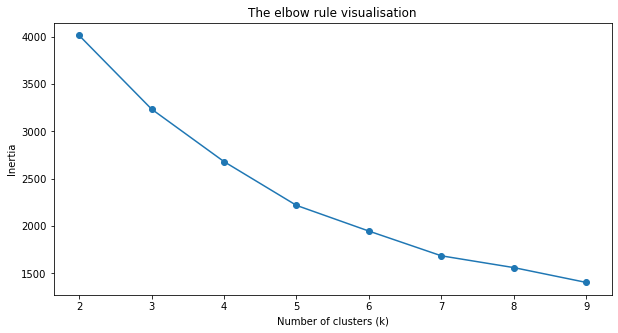

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
krange = range(2,10)

inert = []

for n in krange:
    kmeans_model = KMeans(n, random_state=42, init='k-means++').fit(data_cleaned_sc)
    inert.append(kmeans_model.inertia_)

plt.figure(figsize=(10,5))    
plt.title("The elbow rule visualisation")
plt.plot(krange, inert, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for this data is 4 or 5.

## No of clusters : 4

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_sc)

pred = kmeans.predict(data_cleaned_sc)

df_clustered = df.copy()
df_clustered['Cluster'] = pred + 1

In [21]:
df_clustered

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumTotalPurchases,total_amount,Cluster
0,5524,1957,Bachelor,Single,58138.0,0,0,04/09/2012,58,635,...,0,0,0,0,3,11,1,22,1617,2
1,2174,1954,Bachelor,Single,46344.0,1,1,08/03/2014,38,11,...,0,0,0,0,3,11,0,4,27,1
2,4141,1965,Bachelor,Together,71613.0,0,0,21/08/2013,26,426,...,0,0,0,0,3,11,0,20,776,2
3,6182,1984,Bachelor,Together,26646.0,1,0,10/02/2014,26,11,...,0,0,0,0,3,11,0,6,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,0,0,0,0,3,11,0,14,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Bachelor,Married,61223.0,0,1,13/06/2013,46,709,...,0,0,0,0,3,11,0,16,1341,2
2212,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,0,1,0,0,3,11,0,15,444,2
2213,7270,1981,Bachelor,Divorced,56981.0,0,0,25/01/2014,91,908,...,0,0,0,0,3,11,0,18,1241,2
2214,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,0,0,0,0,3,11,0,21,843,4


In [22]:
df_clustered["Cluster"].value_counts()

1    1101
2     565
4     549
3       1
Name: Cluster, dtype: int64

## No of clusters : 5

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_sc)

pred = kmeans.predict(data_cleaned_sc)

df_clustered = df.copy()
df_clustered['Cluster'] = pred + 1

In [24]:
df_clustered["Cluster"].value_counts()

3    795
4    539
1    482
2    399
5      1
Name: Cluster, dtype: int64

**Shilhouette Coefficient Visualizer**

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

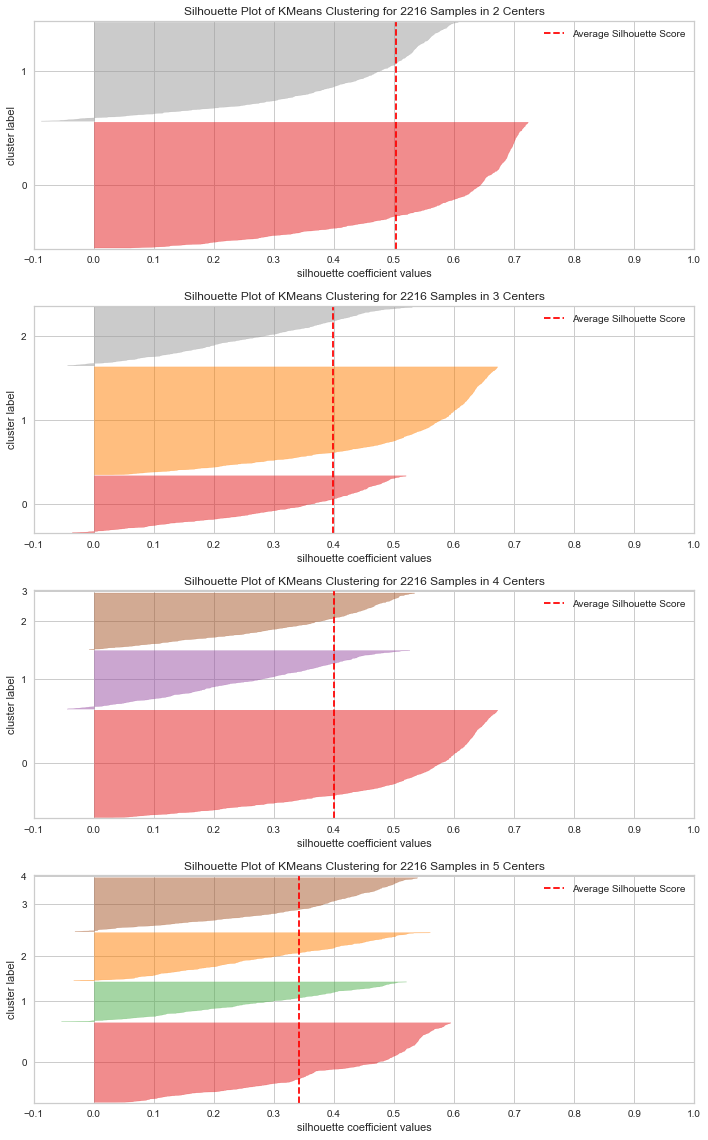

In [26]:
k = range(2, 6)

fig, axes = plt.subplots(4, 1, figsize=(10, 16))

for i in k:   
    kmodel = KMeans(i, init='k-means++', n_init=100, random_state=42)
    v = SilhouetteVisualizer(kmodel, ax=axes[i-2])
    v.fit(data_cleaned_sc)
    v.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()


#### according to the elbow rule plot, 4 or 5 clusters are best

#### by silhouette coefficient visualisation plots, 4 clusters provides relatively high silhouette scores for each cluster.

## 4 CLUSTERS

In [27]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_sc)

pred = kmeans.predict(data_cleaned_sc)

df_clustered = df.copy()
df_clustered['Cluster'] = pred + 1

In [28]:
df_clustered["Cluster"].value_counts()

1    1101
2     565
4     549
3       1
Name: Cluster, dtype: int64

In [29]:
df1 = df_clustered[df_clustered["Cluster"]!=3]

In [30]:
df1["Cluster"].value_counts()

1    1101
2     565
4     549
Name: Cluster, dtype: int64

In [31]:
df1["Cluster"] = df1["Cluster"].replace({4:3})

C:\Users\44782\AppData\Local\Temp/ipykernel_5084/2457330642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Cluster"] = df1["Cluster"].replace({4:3})


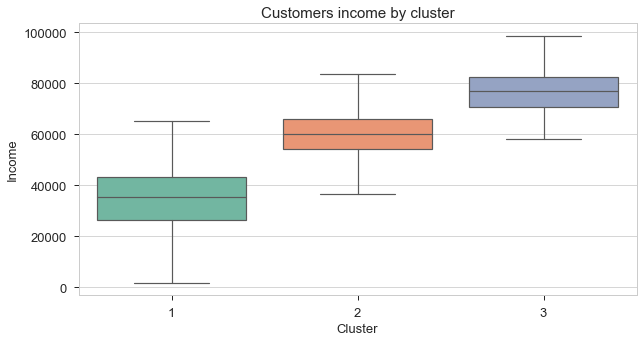

In [32]:
import seaborn as sns
PALETTE = sns.color_palette("Set2")

sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11,
                            "axes.labelsize":13, 
                             "xtick.labelsize": 12,
                             "ytick.labelsize": 12 }) 

plt.figure(figsize=(10,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df1, x='Cluster', y='Income', palette=PALETTE, showfliers=False)
plt.show()


### 2 nd cluster are medium people 
### 3 rd cluster are rich people 
### 1 st cluster are poor people

In [33]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumTotalPurchases,total_amount,Cluster
0,5524,1957,Bachelor,Single,58138.0,0,0,04/09/2012,58,635,...,0,0,0,0,3,11,1,22,1617,2
1,2174,1954,Bachelor,Single,46344.0,1,1,08/03/2014,38,11,...,0,0,0,0,3,11,0,4,27,1
2,4141,1965,Bachelor,Together,71613.0,0,0,21/08/2013,26,426,...,0,0,0,0,3,11,0,20,776,2
3,6182,1984,Bachelor,Together,26646.0,1,0,10/02/2014,26,11,...,0,0,0,0,3,11,0,6,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,0,0,0,0,3,11,0,14,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Bachelor,Married,61223.0,0,1,13/06/2013,46,709,...,0,0,0,0,3,11,0,16,1341,2
2212,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,0,1,0,0,3,11,0,15,444,2
2213,7270,1981,Bachelor,Divorced,56981.0,0,0,25/01/2014,91,908,...,0,0,0,0,3,11,0,18,1241,2
2214,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,0,0,0,0,3,11,0,21,843,3


In [34]:
NumTotalPurchases_cluster = (df1.groupby(by='Cluster')['NumTotalPurchases'].sum().divide(df1['Cluster'].value_counts()))

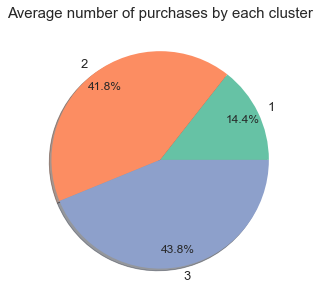

In [35]:
sizes = dict(NumTotalPurchases_cluster)
plt.figure(figsize=(10, 5))
plt.title("Average number of purchases by each cluster")
plt.pie(sizes.values(), labels=df1["Cluster"].value_counts().index, autopct="%.1f%%", pctdistance=0.84, shadow=True, colors=PALETTE)
plt.show()

### 1 st cluster are purchasing less
### 2nd and 3rd cluster are purchasing more

In [36]:
amount_spent_by_cluster = (df1.groupby(by='Cluster')['total_amount'].sum().divide(df1['Cluster'].value_counts()))

In [37]:
amount_spent_by_cluster

Cluster
1     115.524069
2     842.235398
3    1351.843352
dtype: float64

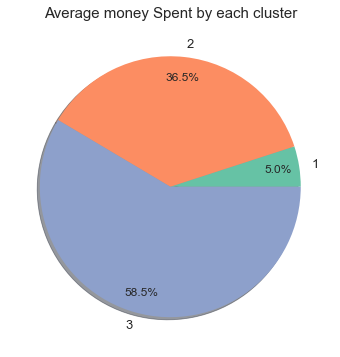

In [38]:
sizes = dict(amount_spent_by_cluster)
plt.figure(figsize=(10, 6))
plt.title("Average money Spent by each cluster")
plt.pie(sizes.values(), labels=df1["Cluster"].value_counts().index, autopct="%.1f%%", pctdistance=0.84, shadow=True, colors=PALETTE)
plt.show()

#### poor Income customers spent less money in the store (cluster 1)
#### very high Income customers spent more money in the store (cluster 3)

## 1st cluster Customer ids

In [39]:
df1[df1["Cluster"]==1].ID.values

array([2174, 6182, 6177, ..., 8080, 8372, 9405], dtype=int64)

## 2nd cluster Customer ids

In [40]:
df1[df1["Cluster"]==2].ID.values

array([ 5524,  4141,  5324,  7446,   965,  8180,  1993,  4047,  8755,
        2968,  6566,  9381,  8375,  3076,  1012,  6518,  4477,  6312,
        8132,  1618,  7247,  3037,  9370,  2683,  7431,  3267,  9215,
         367,  9805, 11051,  8026,   433,  9597, 11084,  2937,  9949,
        3830,  7987,  7055,  9260, 10573,  3934,  7300,  8727,   380,
        2877,   454,  7079,  7375,   709,  5341,  3233,  6439,  2176,
        8932, 10992,   309,  1184,  2379,  2304,  3445,  4391, 10144,
        8148,  2926,  3924,  5596,  4440,  9478,  9750,  2607, 10675,
        9707,  6245,  2579,  9365,  4107,  9336,  5837, 10704,  2928,
        1245,  1729,  6720,  9799,  9999,  2552,  8890,  9973, 10882,
        7030,  8581,  8746,  4324,   238,  9699, 10664,  1142,  2807,
        6131,  6233,  1992,  9697,  3916,   564,   178,  5512,  8970,
        5172,  5562, 10965,  9426,  6605,  3136,  5140,  4945,  8939,
        4943,   713,  4702,  3281,   702,  4769,  7822,  9240,   448,
        9780, 10681,

###  2nd cluster Customer ids

In [41]:
df1[df1["Cluster"]==3].ID.values

array([ 2125,  2114,  6565,  5376,  1966,  4339,  8601,  1371,  8614,
        4114,  2225,  6260, 10383,  6853,  4137,  9369,  1357,  1402,
        1859,  7503,   535,  8504,  4646,  4518,  8908, 10991,  5077,
         999,  1592,  7215,  1491, 11071,  1685,   821,  8690, 10240,
        2730, 10095,  8475,  6637,  8717, 10314,  6935, 10562,  6982,
        5602,  6999,  9938,  6422, 10424,  2798,  6521,     0,  6274,
        2075,  4785,   460,  9449,   313,  9940,  9529,  9265,  8867,
       10089,  1225,   291,  7828,  3762,  1672, 10983, 10102,  4543,
        7119,  9274,  6963,  6320,  1802,  7214, 10151,  7381,  9560,
        1150, 10172,  1411,  1826,   175,  9185, 11056,  6184,  6142,
        7274,  5125,  5955,  6202,  8318,  2669,  7683,  3428,  3523,
        7106,  5067,  4216,  1361,  6932,  1340,  3767,  3725,  6694,
        1137,  2276,  4947, 10648,  7851,  7059,  2416,  7999,  2021,
        9286,  2426,  3403, 11088,   716,   466, 10584,  6071,  4320,
        6036,   203,

### Based on the cluster properties retailer have to plan corresponding marketing campaigns 